<a href="https://colab.research.google.com/github/yskim1230/AIB_Section2-PJT_Modeling-Plan/blob/main/Section2_Project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 사전 조사

필수 라이브러리 설치

In [2]:
!pip install requests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os
import sys
import urllib.request
import json
import re
import numpy as np
import matplotlib.cm as cm

In [4]:
#한글 폰트
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 2s (4,309 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122349 files and di

In [5]:
#import matplotlib.pyplot as plt # 맷플롯립 import 하기
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 성별 기준 패션의류를 검색한 기기

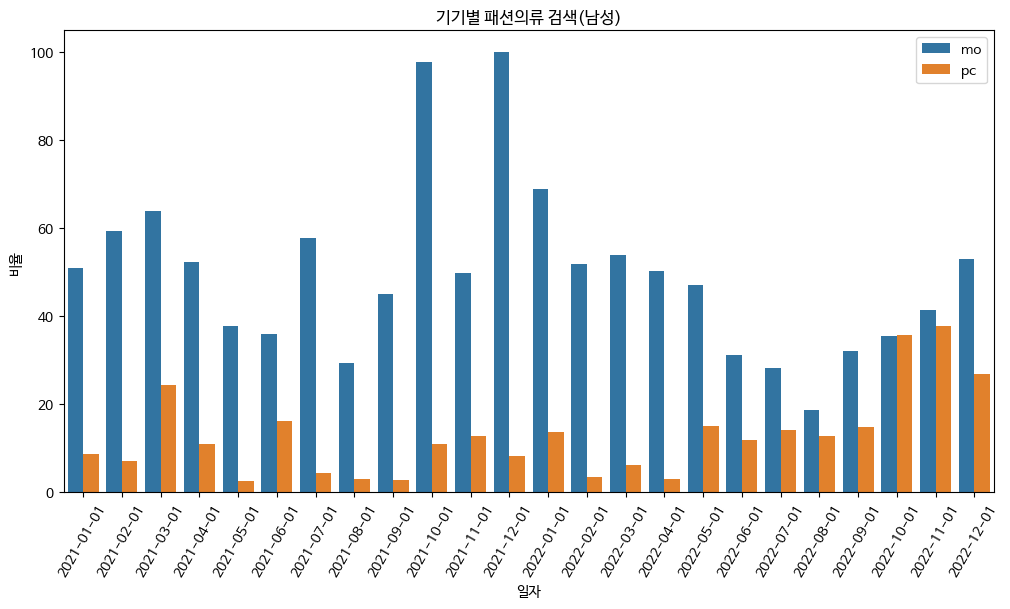

In [ ]:
# 네이버 Open API 인증 정보
client_id = "Hewe5vgmlLvWs_ubCDhs"
client_secret = "u8mu84aRwJ"

# 요청 헤더 설정
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# 요청 URL
url = "https://openapi.naver.com/v1/datalab/shopping/category/keyword/device"

# 요청 Body
body = {
    "startDate": "2021-01-01",
    "endDate": "2022-12-31",
    "timeUnit": "month",
    "category": "50000000",
    "keyword": "남성",
    "device": "",
    "gender": "m",
    "ages": []
}

# API 호출
response = requests.post(url, headers=headers, data=json.dumps(body))

# 응답 데이터 확인
data = response.json()

# 데이터프레임화
results = data['results'][0]['data']
df_mdevice = pd.DataFrame(results, columns=['period', 'ratio', 'group'])
df_mdevice['category'] = '패션의류'
df_mdevice['gender'] = '남성'

# 차트 그래프 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# seaborn 막대그래프 시각화
sns.barplot(data=df_mdevice, x='period', y='ratio', hue='group', ax=ax)

# x, y축 라벨링
ax.set_xlabel('일자')
ax.set_ylabel('비율')
plt.xticks(rotation=60)

# 그래프 제목 설정
title = '기기별 패션의류 검색(남성)'
ax.set_title(title)

# 범례 설정
ax.legend()

plt.show()

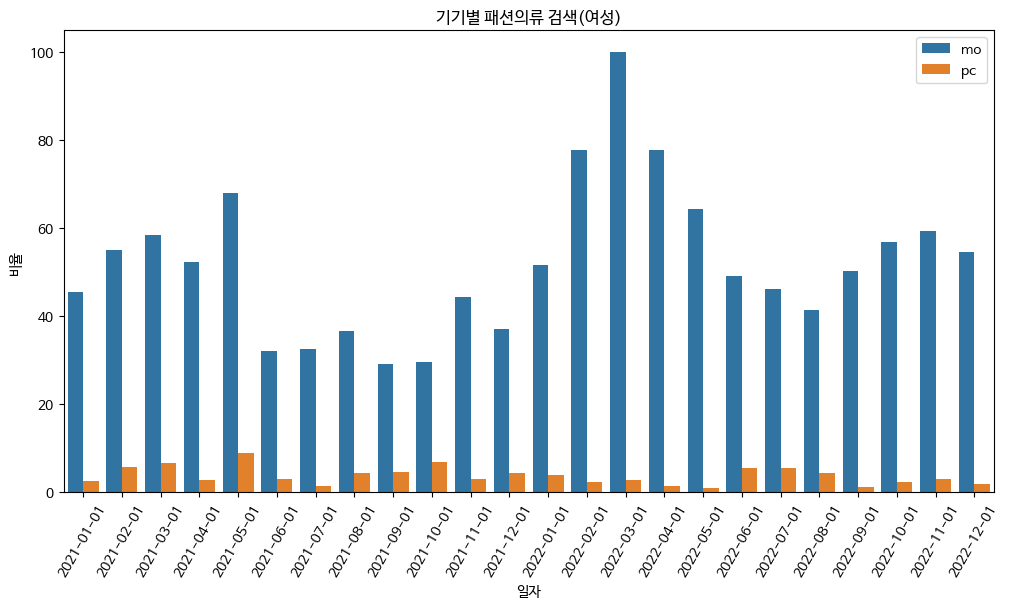

In [ ]:

# 네이버 Open API 인증 정보
client_id = "Hewe5vgmlLvWs_ubCDhs"
client_secret = "u8mu84aRwJ"

# 요청 헤더 설정
headers = {
    'Content-Type': 'application/json',
    'X-Naver-Client-Id': client_id,
    'X-Naver-Client-Secret': client_secret
}

# 요청 URL
url = "https://openapi.naver.com/v1/datalab/shopping/category/keyword/device"

# 요청 Body
body = {
    "startDate": "2021-01-01",
    "endDate": "2022-12-31",
    "timeUnit": "month",
    "category": "50000000",
    "keyword": "여성",
    "device": "",
    "gender": "f",
    "ages": []
}

# API 호출
response = requests.post(url, headers=headers, data=json.dumps(body))

# 응답 데이터 확인
data = response.json()

# 데이터프레임화
results = data['results'][0]['data']
df_fdevice = pd.DataFrame(results, columns=['period', 'ratio', 'group'])
df_fdevice['category'] = '패션의류'
df_fdevice['gender'] = '여성'

# 차트 그래프 시각화
fig, ax = plt.subplots(figsize=(12, 6))

# seaborn 막대그래프 시각화
sns.barplot(data=df_fdevice, x='period', y='ratio', hue='group', ax=ax)

# x, y축 라벨링
ax.set_xlabel('일자')
ax.set_ylabel('비율')
plt.xticks(rotation=60)

# 그래프 제목 설정
title = '기기별 패션의류 검색(여성)'
ax.set_title(title)

# 범례 설정
ax.legend()

plt.show()

# 성별로 보는 패션의류 검색비율(모바일)

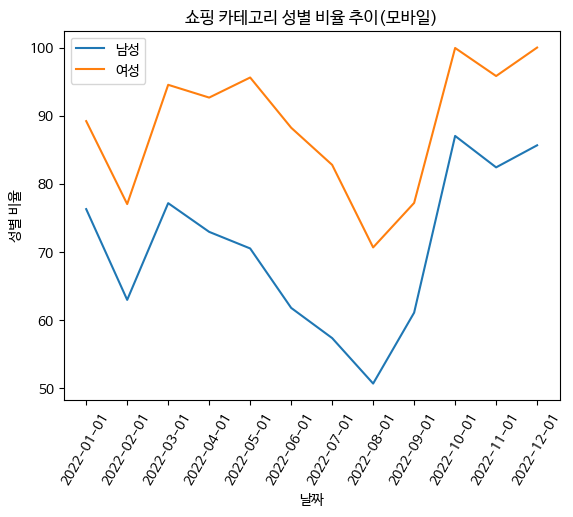

In [ ]:

client_id = "Hewe5vgmlLvWs_ubCDhs"
client_secret = "u8mu84aRwJ"

url = "https://openapi.naver.com/v1/datalab/shopping/category/gender"

headers = {
    "Content-Type": "application/json",
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
}

body_f = {
    "startDate": "2022-01-01",
    "endDate": "2022-12-31",
    "timeUnit": "month",
    "category": "50000000",
    "device": "mo",
    "gender": "f"
}

body_m = {
    "startDate": "2021-04-01",
    "endDate": "2022-12-31",
    "timeUnit": "month",
    "category": "50000000",
    "device": "mo",
    "gender": "m"
}

response_f = requests.post(url, headers=headers, data=json.dumps(body_f))
result_f = response_f.json()

response_m = requests.post(url, headers=headers, data=json.dumps(body_m))
result_m = response_m.json()

df_f = pd.DataFrame(result_f['results'][0]['data'])
df_f = df_f[['period', 'ratio']]
df_f.columns = ['날짜', '여성비율']

df_m = pd.DataFrame(result_m['results'][0]['data'])
df_m = df_m[['period', 'ratio']]
df_m.columns = ['날짜', '남성비율']

df = pd.merge(df_m, df_f, on='날짜')

#시각화
plt.plot(df['날짜'], df['남성비율'], label='남성')
plt.plot(df['날짜'], df['여성비율'], label='여성')

plt.xlabel('날짜')
plt.ylabel('성별 비율')
plt.title('쇼핑 카테고리 성별 비율 추이(모바일)')
plt.xticks(rotation=60)

plt.legend()
plt.show()

# 네이버 쇼핑 API를 통한 최저가 검색


In [ ]:
# 클라이언트 아이디와 시크릿을 변수에 저장합니다.
client_id = "Hewe5vgmlLvWs_ubCDhs"
client_secret = "u8mu84aRwJ"
# 검색어와 필요한 데이터 개수, 정렬 순서 등을 변수에 저장합니다.
query = "패션의류"
display = 100
sort = "sim"

# API 요청을 보낼 URL을 생성합니다.
url = f"https://openapi.naver.com/v1/search/shop.json?query={query}&display={display}&sort={sort}"

# API 요청에 필요한 헤더 정보를 변수에 저장합니다.
headers = {
    "X-Naver-Client-Id": client_id,
    "X-Naver-Client-Secret": client_secret,
}


# API 요청을 보내고, 응답 데이터를 받습니다.
response = requests.get(url, headers=headers)
data = response.json()

# 데이터에서 모든 결과 컬럼을 추출합니다.
result = []
for i, item in enumerate(data["items"]):
    rank = i + 1
    title = item["title"]
    link = item["link"]
    image = item["image"]
    lprice = item["lprice"]
    hprice = item["hprice"]
    mallName = item["mallName"]
    productId = item["productId"]
    productType = item["productType"]
    brand = item["brand"]
    maker = item["maker"]
    category1 = item["category1"]
    category2 = item["category2"]
    category3 = item["category3"]
    category4 = item["category4"]
    result.append((rank, title, link, image, lprice, hprice, mallName, productId, productType, brand, maker, category1, category2, category3, category4))

# 추출한 데이터를 데이터 프레임으로 변환합니다.
df_top100 = pd.DataFrame(result, columns=["순위", "검색어", "링크", "썸네일 이미지", "최저가", "최고가", "쇼핑몰 이름", "제품 ID", "제품 타입", "브랜드", "제조사", "카테고리1", "카테고리2", "카테고리3", "카테고리4"])



In [ ]:
df_top100

,순위,검색어,링크,썸네일 이미지,최저가,최고가,쇼핑몰 이름,제품 ID,제품 타입,브랜드,제조사,카테고리1,카테고리2,카테고리3,카테고리4
0,1,스투시 베이직로고 반팔 티셔츠,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_326345...,37830,,네이버,32634569770,1,스투시,,패션의류,남성의류,티셔츠,
1,2,폴로 랄프로렌 여성 반팔 니트 상의 화이트,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_841172...,69300,,AWSOME,84117234367,2,폴로랄프로렌,,패션의류,여성의류,니트/스웨터,
2,3,루아 패턴 롱원피스 여름 휴양지 원피스 휴가 바캉스 루즈핏 호캉스 에스닉 여행 필수,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_825881...,18800,,썸메모리,82588186197,2,,,패션의류,여성의류,원피스,
3,4,리스트 스트레이트 싱글 원버튼 재킷 TWWJKM52510,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_356941...,48110,,네이버,35694137838,1,리스트,,패션의류,여성의류,재킷,
4,5,메종키츠네 더블 폭스헤드 반팔 티셔츠 BU00103KJ0008,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_266507...,63000,,네이버,26650739290,1,메종키츠네,메종키츠네,패션의류,남성의류,티셔츠,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,LAP 랩 원피스 롱 여름 바캉스룩 라운드넥 브이넥 반팔 에스닉 쉬폰,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_843606...,28000,,Brand Mall,84360667807,2,랩,랩,패션의류,여성의류,원피스,
96,97,비비안 Histore 심리스 노와이어 면심리스 스포츠브라 여성팬티,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_825009...,9900,,아자두,82500930173,2,비비안,,패션의류,여성언더웨어/잠옷,브라,
97,98,나이키 바람막이 드라이핏 스우시 집업 자켓,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_856292...,57000,,퀀텀플렉스,85629279775,2,나이키,나이키,패션의류,여성의류,재킷,
98,99,반티 아이스 하키반티 하키복반티 스포츠반티 반티사이트,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_800826...,13000,,반티꼬마,80082662756,2,,,패션의류,남성의류,유니폼/단체복,


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


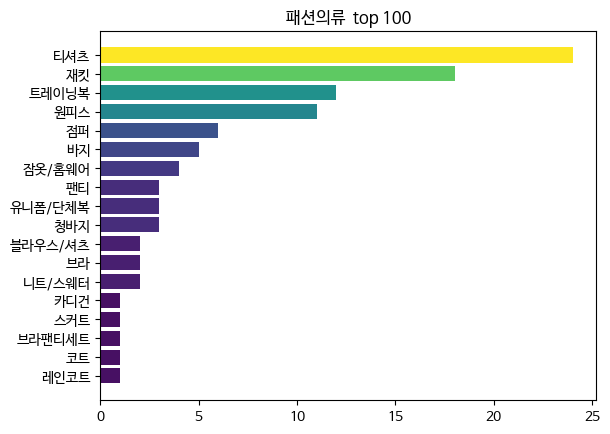

In [ ]:
# 0~255 범위의 RGB 색상값을 0~1 범위로 변환하는 함수
def rgb_to_float(rgb):
    return tuple(map(lambda x: x/255.0, rgb))

# 데이터프레임(df_top100)에서 카테고리3 기준으로 집계합니다.
df_agg = df_top100.groupby("카테고리3").size().reset_index(name="개수")

# 카테고리3 기준으로 내림 차순으로 정렬합니다.
df_agg = df_agg.sort_values("개수")

# 막대 그래프를 그립니다.
colors = cm.viridis(df_agg["개수"] / max(df_agg["개수"])) # 색상값 생성
plt.barh(df_agg["카테고리3"], df_agg["개수"], color=colors)
plt.title("패션의류 top 100")
plt.show()

In [ ]:
df_agg

,카테고리3,개수
1,레인코트,1
14,코트,1
4,브라팬티세트,1
6,스커트,1
13,카디건,1
0,니트/스웨터,2
3,브라,2
5,블라우스/셔츠,2
12,청바지,3
8,유니폼/단체복,3


In [ ]:
client_id = "Hewe5vgmlLvWs_ubCDhs"
client_secret = "u8mu84aRwJ"
#위에서 구한 df_agg의 카테고리 3을 넣는다
queries = df_agg['카테고리3'].tolist()
idx = 0
display = 100
sort = 'dsc'
start = 1
end = 1000

shop_df = pd.DataFrame(columns=("Title", "Link", "Image", "Low price", "High Price", "Mall Name", "Product Id", "Product Type", "Maker", "Brand", "category1", "category2","category3","category4"))

for query in queries:
    for start_index in range(start, end, display):
        url = 'https://openapi.naver.com/v1/search/shop?query=' + urllib.parse.quote(query) \
              + "&display=" + str(display) \
              + "&start=" + str(start_index)

        request = urllib.request.Request(url)
        request.add_header('X-Naver-Client-Id', client_id)
        request.add_header('X-Naver-Client-Secret', client_secret)
        response = urllib.request.urlopen(request)
        rescode = response.getcode()
        if (rescode == 200):
            response_body = response.read()
            response_dict = json.loads(response_body.decode('utf-8'))
            items = response_dict['items']
            for item_index in range(0, len(items)):
                remove_tag = re.compile('<.*>?>')
                title = re.sub(remove_tag, '', items[item_index]['title'])
                link = items[item_index]['link']
                image = items[item_index]['image']
                low_price = items[item_index]['lprice']
                high_price = items[item_index]['hprice']
                mall_name = items[item_index]['mallName']
                product_id = items[item_index]['productId']
                product_type = items[item_index]['productType']
                maker = items[item_index]['maker']
                brand = items[item_index]['brand']
                category1 = items[item_index]['category1']
                category2 = items[item_index]['category2']
                category3 = items[item_index]['category3']
                category4 = items[item_index]['category4']
                shop_df.loc[idx] = [title, link, image, low_price, high_price, mall_name, product_id, product_type, maker, brand, category1, category2, category3 , category4]
                idx += 1
        else:
            print("Error Code:" + rescode)


In [ ]:
shop_df

,Title,Link,Image,Low price,High Price,Mall Name,Product Id,Product Type,Maker,Brand,category1,category2,category3,category4
0,지오다노 372513,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_389262...,21930,,네이버,38926292903,1,지오다노,지오다노,패션의류,여성의류,레인코트,
1,모이몰른 아동 장화 아기옷 어린이집등원룩,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_832109...,35000,,모이몰른에덴,83210928708,2,한세드림,모이몰른,출산/육아,유아동의류,레인코트,
2,EVA,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830973...,10900,,SABU,83097322297,2,,,패션의류,남성의류,레인코트,
3,날씨요정 아기공룡 유아 장화세트,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830318...,23800,,날씨요정,83031810212,2,,날씨요정,출산/육아,유아동의류,레인코트,
4,유가모아 어린이 판초 키즈 아동 여아 남아,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830026...,15900,,유가모아,83002602393,2,,,출산/육아,유아동의류,레인코트,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,아디다스 여성 기능성 반팔,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830997...,16400,,스포츠전문몰,83099797781,2,아디다스,아디다스,패션의류,여성의류,티셔츠,
17996,JORDAN 조던 주니어 보이 짐23 반팔 N232TS392P,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_386106...,35000,,네이버,38610694618,1,나이키,JORDAN,출산/육아,유아동의류,티셔츠,
17997,타미힐피거 여성 라운드넥 5버튼 스몰 플래그 골지 긴팔 2컬러 76J3182,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_344376...,29400,,네이버,34437655174,1,타미힐피거,타미힐피거,패션의류,여성의류,티셔츠,
17998,온앤온 브이넥 반팔 JW2ME507,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_332680...,14700,,네이버,33268080101,1,,온앤온,패션의류,여성의류,티셔츠,


In [ ]:
shop_df.to_csv('naver_shop2.csv', index=False)

# EDA

naver_shop에 필요없는 열 제거
Link, 
Image,
High price,
ProductId,


In [ ]:
naver_shop = pd.read_csv('/content/naver_shop2.csv')

In [ ]:
naver_shop

,Title,Link,Image,Low price,High Price,Mall Name,Product Id,Product Type,Maker,Brand,category1,category2,category3,category4
0,지오다노 372513,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_389262...,21930,NaN,네이버,38926292903,1,지오다노,지오다노,패션의류,여성의류,레인코트,NaN
1,모이몰른 아동 장화 아기옷 어린이집등원룩,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_832109...,35000,NaN,모이몰른에덴,83210928708,2,한세드림,모이몰른,출산/육아,유아동의류,레인코트,NaN
2,EVA,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830973...,10900,NaN,SABU,83097322297,2,NaN,NaN,패션의류,남성의류,레인코트,NaN
3,날씨요정 아기공룡 유아 장화세트,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830318...,23800,NaN,날씨요정,83031810212,2,NaN,날씨요정,출산/육아,유아동의류,레인코트,NaN
4,유가모아 어린이 판초 키즈 아동 여아 남아,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830026...,15900,NaN,유가모아,83002602393,2,NaN,NaN,출산/육아,유아동의류,레인코트,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,아디다스 여성 기능성 반팔,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830997...,16400,NaN,스포츠전문몰,83099797781,2,아디다스,아디다스,패션의류,여성의류,티셔츠,NaN
17996,JORDAN 조던 주니어 보이 짐23 반팔 N232TS392P,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_386106...,35000,NaN,네이버,38610694618,1,나이키,JORDAN,출산/육아,유아동의류,티셔츠,NaN
17997,타미힐피거 여성 라운드넥 5버튼 스몰 플래그 골지 긴팔 2컬러 76J3182,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_344376...,29400,NaN,네이버,34437655174,1,타미힐피거,타미힐피거,패션의류,여성의류,티셔츠,NaN
17998,온앤온 브이넥 반팔 JW2ME507,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_332680...,14700,NaN,네이버,33268080101,1,NaN,온앤온,패션의류,여성의류,티셔츠,NaN


In [ ]:
naver_shop.info()
# 데이터 없는 컬럼은 삭제
# High Price와 category4 컬럼 삭제
naver_shop = naver_shop.drop(['High Price', 'category4'], axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         17987 non-null  object 
 1   Link          18000 non-null  object 
 2   Image         18000 non-null  object 
 3   Low price     18000 non-null  int64  
 4   High Price    0 non-null      float64
 5   Mall Name     18000 non-null  object 
 6   Product Id    18000 non-null  int64  
 7   Product Type  18000 non-null  int64  
 8   Maker         4580 non-null   object 
 9   Brand         12087 non-null  object 
 10  category1     18000 non-null  object 
 11  category2     18000 non-null  object 
 12  category3     18000 non-null  object 
 13  category4     0 non-null      float64
dtypes: float64(2), int64(3), object(9)
memory usage: 1.9+ MB


In [ ]:
# Title 컬럼에서 결측치를 가지고 있는 행 추출
null_rows = naver_shop[naver_shop['Title'].isnull()]
# 결과 출력
print(null_rows) 



      Title                                               Link  \
83      NaN  https://search.shopping.naver.com/gate.nhn?id=...   
326     NaN  https://search.shopping.naver.com/gate.nhn?id=...   
420     NaN  https://search.shopping.naver.com/gate.nhn?id=...   
470     NaN  https://search.shopping.naver.com/gate.nhn?id=...   
862     NaN  https://search.shopping.naver.com/gate.nhn?id=...   
2044    NaN  https://search.shopping.naver.com/gate.nhn?id=...   
2056    NaN  https://search.shopping.naver.com/gate.nhn?id=...   
6111    NaN  https://search.shopping.naver.com/gate.nhn?id=...   
6829    NaN  https://search.shopping.naver.com/gate.nhn?id=...   
7001    NaN  https://search.shopping.naver.com/gate.nhn?id=...   
7150    NaN  https://search.shopping.naver.com/gate.nhn?id=...   
8977    NaN  https://search.shopping.naver.com/gate.nhn?id=...   
11748   NaN  https://search.shopping.naver.com/gate.nhn?id=...   

                                                   Image  Low price Mall Na

실제 링크로 들어가보니 존재하지 않는 상품이거나 잘못된 링크라고 나오기에 삭제하는 것이 맞다

In [ ]:
# Title 행에서 결측치(null 값)을 가지고 있는 행 삭제
naver_shop = naver_shop.dropna(subset=['Title'])
naver_shop = naver_shop.reset_index(drop=True)

# 결과 출력
naver_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17987 entries, 0 to 17986
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         17987 non-null  object
 1   Link          17987 non-null  object
 2   Image         17987 non-null  object
 3   Low price     17987 non-null  int64 
 4   Mall Name     17987 non-null  object
 5   Product Id    17987 non-null  int64 
 6   Product Type  17987 non-null  int64 
 7   Maker         4580 non-null   object
 8   Brand         12086 non-null  object
 9   category1     17987 non-null  object
 10  category2     17987 non-null  object
 11  category3     17987 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.6+ MB


이제 'Maker' 와 'Brand'의 결측치 처리가 필요하다.

1. Maker는 면직물을 만든 업체명을 의미하고 있으며(ex: 나이키, 신세계인터네셔널, 지오다노,삼성물산) 대기업 외 영세업체는 표기를 하지 않는 경우가 대다수인 것으로 확인

2. Brand는 면직물을 받아와 가공해서 브랜드를 붙여 파는 경우 표기가 되어있다. 우리가 백화점이나 쇼핑몰에서 흔히 보는 나이키,아이다스,톰보이, 지오다노 등등


따라서 만약 우리가 최저가를 서치하기 위해서는 maker가 영세한 곳에서 만들고 브랜드를 붙여파는 의류를 선택하는 판매 전략이 좋은지, maker, brand 둘다 없는 옷을 선택하여 걸어두는 것이 매출에 도움될지 확인이 필요하다.





1. Maker의 NUN 값은 'No-Maker' 로 변경
2. Brand의 NUN 값은 'NO-Brand' 로 변경



In [ ]:
# Maker의 null 값을 'No-Maker'로 변경
naver_shop['Maker'] = naver_shop['Maker'].fillna('No-Maker')

# Brand의 null 값을 'NO-Brand'로 변경
naver_shop['Brand'] = naver_shop['Brand'].fillna('NO-Brand')

# 변수에 할당
naver_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17987 entries, 0 to 17986
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         17987 non-null  object
 1   Link          17987 non-null  object
 2   Image         17987 non-null  object
 3   Low price     17987 non-null  int64 
 4   Mall Name     17987 non-null  object
 5   Product Id    17987 non-null  int64 
 6   Product Type  17987 non-null  int64 
 7   Maker         17987 non-null  object
 8   Brand         17987 non-null  object
 9   category1     17987 non-null  object
 10  category2     17987 non-null  object
 11  category3     17987 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.6+ MB


In [ ]:
# 기초 전처리 완료 및 백업
naver_shop.to_csv('naver_shop_EDA_comp.csv', index=False)



In [22]:
naver_shop = pd.read_csv('https://raw.githubusercontent.com/yskim1230/AIB_Section2-PJT_Modeling-Plan/main/naver_shop_EDA_comp.csv')

# Featuer Engineering

Low Price 컬럼을 범주형 형태 컬럼을 추가하여 분석에 도움이 되도록 할 예정이다. 범위 지정을 위해 금액 분포를 시각화 한다.

In [23]:
max_price = naver_shop['Low price'].max()
min_price = naver_shop['Low price'].min()

In [24]:
max_price_row = naver_shop[naver_shop['Low price'] == max_price]
max_price_row

,Title,Link,Image,Low price,Mall Name,Product Id,Product Type,Maker,Brand,category1,category2,category3
16817,샤넬 글리터 트위드 블랙 P72409,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_837713...,13680000,세나도보나,83771345599,2,샤넬,샤넬,패션의류,여성의류,재킷


In [25]:
min_price_row = naver_shop[naver_shop['Low price'] == min_price]
min_price_row

,Title,Link,Image,Low price,Mall Name,Product Id,Product Type,Maker,Brand,category1,category2,category3
738,일회용 행사용 휴대용,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_252475...,10,네이버,25247563018,1,No-Maker,NO-Brand,패션의류,남성의류,레인코트


In [26]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

naver_shop.describe()

,Low price,Product Id,Product Type
count,17987.00,17987.00,17987.00
mean,67324.86,44790010801.19,1.23
std,168041.65,19381913116.44,0.42
min,10.00,5529208049.00,1.00
25%,20790.00,35677387426.50,1.00
50%,36700.00,37861348926.00,1.00
75%,69900.00,38987531773.50,1.00
max,13680000.00,85919599037.00,2.00


최저가 확인 결과 금액 분포가 매우 광범위한 것을 확인.

데이터를 확인해보니 샤넬이어서 그렇다

이상치는 아니지만 회귀 분석시 문제가 될 소지가 있기에 이번 프로젝트에서만 이상치라 간주하고 삭제한다.

삭제 기준은  IQR(interquartile range)을 이용한 이상치 제거를 사용한다. IQR은 데이터의 1사분위(Q1)와 3사분위(Q3)를 이용하여 계산되며, Q1 - 1.5 * IQR 보다 작거나 Q3 + 1.5 * IQR 보다 큰 값은 이상치로 간주하여 제거한다.

In [27]:
# 이상치 제거 함수
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    df = df[(df[column] >= q1 - 1.5 * iqr) & (df[column] <= q3 + 1.5 * iqr)]
    return df

# 이상치 제거 적용
naver_shop = remove_outliers(naver_shop, 'Low price')
print(naver_shop.describe())

       Low price     Product Id  Product Type
count   16426.00       16426.00      16426.00
mean    43106.78 44853036466.23          1.23
std     32208.43 19590897417.94          0.42
min        10.00  5529208049.00          1.00
25%     19710.00 35674955329.25          1.00
50%     33500.00 37854471345.50          1.00
75%     59000.00 38994321641.00          1.00
max    143560.00 85919599037.00          2.00


In [28]:
#1500여개 삭제
naver_shop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16426 entries, 0 to 17986
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         16426 non-null  object
 1   Link          16426 non-null  object
 2   Image         16426 non-null  object
 3   Low price     16426 non-null  int64 
 4   Mall Name     16426 non-null  object
 5   Product Id    16426 non-null  int64 
 6   Product Type  16426 non-null  int64 
 7   Maker         16426 non-null  object
 8   Brand         16426 non-null  object
 9   category1     16426 non-null  object
 10  category2     16426 non-null  object
 11  category3     16426 non-null  object
dtypes: int64(3), object(9)
memory usage: 1.6+ MB


In [29]:
# 최저가를 4개의 구간으로 나눔

max_price = naver_shop['Low price'].max()
min_price = naver_shop['Low price'].min()

# 4개의 구간으로 나눔
cut_points = np.linspace(min_price, max_price, num=5, endpoint=True)
label_names = ['Very Cheap', 'Cheap', 'Moderate', 'Expensive']
naver_shop['Price_range'] = pd.cut(naver_shop['Low price'], bins=cut_points, labels=label_names, include_lowest=True)
naver_shop

,Title,Link,Image,Low price,Mall Name,Product Id,Product Type,Maker,Brand,category1,category2,category3,Price_range
0,지오다노 372513,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_389262...,21930,네이버,38926292903,1,지오다노,지오다노,패션의류,여성의류,레인코트,Very Cheap
1,모이몰른 아동 장화 아기옷 어린이집등원룩,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_832109...,35000,모이몰른에덴,83210928708,2,한세드림,모이몰른,출산/육아,유아동의류,레인코트,Very Cheap
2,EVA,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830973...,10900,SABU,83097322297,2,No-Maker,NO-Brand,패션의류,남성의류,레인코트,Very Cheap
3,날씨요정 아기공룡 유아 장화세트,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830318...,23800,날씨요정,83031810212,2,No-Maker,날씨요정,출산/육아,유아동의류,레인코트,Very Cheap
4,유가모아 어린이 판초 키즈 아동 여아 남아,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830026...,15900,유가모아,83002602393,2,No-Maker,NO-Brand,출산/육아,유아동의류,레인코트,Very Cheap
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17982,아디다스 여성 기능성 반팔,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_830997...,16400,스포츠전문몰,83099797781,2,아디다스,아디다스,패션의류,여성의류,티셔츠,Very Cheap
17983,JORDAN 조던 주니어 보이 짐23 반팔 N232TS392P,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_386106...,35000,네이버,38610694618,1,나이키,JORDAN,출산/육아,유아동의류,티셔츠,Very Cheap
17984,타미힐피거 여성 라운드넥 5버튼 스몰 플래그 골지 긴팔 2컬러 76J3182,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_344376...,29400,네이버,34437655174,1,타미힐피거,타미힐피거,패션의류,여성의류,티셔츠,Very Cheap
17985,온앤온 브이넥 반팔 JW2ME507,https://search.shopping.naver.com/gate.nhn?id=...,https://shopping-phinf.pstatic.net/main_332680...,14700,네이버,33268080101,1,No-Maker,온앤온,패션의류,여성의류,티셔츠,Very Cheap


In [30]:
naver_shop = naver_shop.drop(['Link', 'Image', 'Product Id'], axis=1)

In [31]:
naver_shop

,Title,Low price,Mall Name,Product Type,Maker,Brand,category1,category2,category3,Price_range
0,지오다노 372513,21930,네이버,1,지오다노,지오다노,패션의류,여성의류,레인코트,Very Cheap
1,모이몰른 아동 장화 아기옷 어린이집등원룩,35000,모이몰른에덴,2,한세드림,모이몰른,출산/육아,유아동의류,레인코트,Very Cheap
2,EVA,10900,SABU,2,No-Maker,NO-Brand,패션의류,남성의류,레인코트,Very Cheap
3,날씨요정 아기공룡 유아 장화세트,23800,날씨요정,2,No-Maker,날씨요정,출산/육아,유아동의류,레인코트,Very Cheap
4,유가모아 어린이 판초 키즈 아동 여아 남아,15900,유가모아,2,No-Maker,NO-Brand,출산/육아,유아동의류,레인코트,Very Cheap
...,...,...,...,...,...,...,...,...,...,...
17982,아디다스 여성 기능성 반팔,16400,스포츠전문몰,2,아디다스,아디다스,패션의류,여성의류,티셔츠,Very Cheap
17983,JORDAN 조던 주니어 보이 짐23 반팔 N232TS392P,35000,네이버,1,나이키,JORDAN,출산/육아,유아동의류,티셔츠,Very Cheap
17984,타미힐피거 여성 라운드넥 5버튼 스몰 플래그 골지 긴팔 2컬러 76J3182,29400,네이버,1,타미힐피거,타미힐피거,패션의류,여성의류,티셔츠,Very Cheap
17985,온앤온 브이넥 반팔 JW2ME507,14700,네이버,1,No-Maker,온앤온,패션의류,여성의류,티셔츠,Very Cheap


In [ ]:
# 추가적인 fe 이 필요
# 브랜드 카디널리타가 너무 높다
# 메이커 카디널리티가 너무 높다
# 있다 없다 유무로 해서 해야하거나 상위 브랜드를 추려서 소분류 10개로 분류하던가 해야 겠다.
# 예를 들어 삼성물산, 신세계 등 들어봣을 법한 건 A 클래스, 

# 추가 Feature Engineering
- Brand와 Maker 카디널리티가 너무 높음
- 향후 회귀 분석시 one-hot encoding을 써도 과적합 문제 발생 가능성 다분
- Maker Point / Brand Point 라는 컬럼 추가 예정
- Maker란 제품을 만든 제조사를 의미하기에 현대에 와서는 크게 중요하지 않음. 있으면 1점, No-Maker면 0점
- Brand가 현대에 와서는 더 중요한 의미(샤넬이냐 유니클로나는 매우 큰 차이), 유명 브랜드 기준 순위를 선정하여 순위 순서대로 3점, 2점 , 1점순으로 하락. No-Brand면 0점


In [32]:
# 'maker' 컬럼의 카디널리티 확인
maker_cardinality = len(naver_shop['Maker'].unique())
print('maker 카디널리티:', maker_cardinality)

# 'brand' 컬럼의 카디널리티 확인
brand_cardinality = len(naver_shop['Brand'].unique())
print('brand 카디널리티:', brand_cardinality)

# 'category1' 컬럼의 카디널리티 확인
category1_cardinality = len(naver_shop['category1'].unique())
print('category1 카디널리티:', category1_cardinality)

# 'category2' 컬럼의 카디널리티 확인
category2_cardinality = len(naver_shop['category2'].unique())
print('category2 카디널리티:', category2_cardinality)

# 'category3' 컬럼의 카디널리티 확인
category3_cardinality = len(naver_shop['category3'].unique())
print('category3 카디널리티:', category3_cardinality)


# 'Price_range' 컬럼의 카디널리티 확인
Price_range_cardinality = len(naver_shop['Price_range'].unique())
print('Price_range 카디널리티:', Price_range_cardinality)

maker 카디널리티: 427
brand 카디널리티: 891
category1 카디널리티: 2
category2 카디널리티: 5
category3 카디널리티: 18
Price_range 카디널리티: 4


In [34]:
# naver_shop['Maker Point'] 를 만들고 규칙은 naver_shop['Maker'] = No-Maker 면 0점 아니면 1로 입력
naver_shop['Maker Point'] = naver_shop['Maker'].apply(lambda x: 0 if x == 'No-Maker' else 1)
naver_shop

,Title,Low price,Mall Name,Product Type,Maker,Brand,category1,category2,category3,Price_range,Maker Point
0,지오다노 372513,21930,네이버,1,지오다노,지오다노,패션의류,여성의류,레인코트,Very Cheap,1
1,모이몰른 아동 장화 아기옷 어린이집등원룩,35000,모이몰른에덴,2,한세드림,모이몰른,출산/육아,유아동의류,레인코트,Very Cheap,1
2,EVA,10900,SABU,2,No-Maker,NO-Brand,패션의류,남성의류,레인코트,Very Cheap,0
3,날씨요정 아기공룡 유아 장화세트,23800,날씨요정,2,No-Maker,날씨요정,출산/육아,유아동의류,레인코트,Very Cheap,0
4,유가모아 어린이 판초 키즈 아동 여아 남아,15900,유가모아,2,No-Maker,NO-Brand,출산/육아,유아동의류,레인코트,Very Cheap,0
...,...,...,...,...,...,...,...,...,...,...,...
17982,아디다스 여성 기능성 반팔,16400,스포츠전문몰,2,아디다스,아디다스,패션의류,여성의류,티셔츠,Very Cheap,1
17983,JORDAN 조던 주니어 보이 짐23 반팔 N232TS392P,35000,네이버,1,나이키,JORDAN,출산/육아,유아동의류,티셔츠,Very Cheap,1
17984,타미힐피거 여성 라운드넥 5버튼 스몰 플래그 골지 긴팔 2컬러 76J3182,29400,네이버,1,타미힐피거,타미힐피거,패션의류,여성의류,티셔츠,Very Cheap,1
17985,온앤온 브이넥 반팔 JW2ME507,14700,네이버,1,No-Maker,온앤온,패션의류,여성의류,티셔츠,Very Cheap,0


In [36]:
brand_point = pd.read_csv('https://raw.githubusercontent.com/yskim1230/AIB_Section2-PJT_Modeling-Plan/main/brand%20score.csv')
brand_point

,Brand,Score
0,지오다노,3.00
1,모이몰른,1.00
2,날씨요정,1.00
3,치크,1.00
4,오즈키즈,1.00
...,...,...
884,엑시오,2.00
885,폴스미스,1.00
886,게스키즈,2.00
887,노티카,1.00


In [38]:
# naver_shop['brand Point'] 를 만들고 규칙은 naver_shop['brand'] = No-brand 면 0점 , 해당 하는 점수는 brand point 테이블에서 가져옴
naver_shop = pd.merge(naver_shop, brand_point, on='Brand', how='left')
naver_shop['Brand Point'] = naver_shop['Score'].fillna(0)


In [42]:
naver_shop = naver_shop.drop(['Score'], axis=1)

KeyError: ignored

In [43]:
naver_shop['Brand Point'] = naver_shop['Brand Point'].astype(int)

In [44]:
naver_shop

,Title,Low price,Mall Name,Product Type,Maker,Brand,category1,category2,category3,Price_range,Maker Point,Brand Point
0,지오다노 372513,21930,네이버,1,지오다노,지오다노,패션의류,여성의류,레인코트,Very Cheap,1,3
1,모이몰른 아동 장화 아기옷 어린이집등원룩,35000,모이몰른에덴,2,한세드림,모이몰른,출산/육아,유아동의류,레인코트,Very Cheap,1,1
2,EVA,10900,SABU,2,No-Maker,NO-Brand,패션의류,남성의류,레인코트,Very Cheap,0,0
3,날씨요정 아기공룡 유아 장화세트,23800,날씨요정,2,No-Maker,날씨요정,출산/육아,유아동의류,레인코트,Very Cheap,0,1
4,유가모아 어린이 판초 키즈 아동 여아 남아,15900,유가모아,2,No-Maker,NO-Brand,출산/육아,유아동의류,레인코트,Very Cheap,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
16421,아디다스 여성 기능성 반팔,16400,스포츠전문몰,2,아디다스,아디다스,패션의류,여성의류,티셔츠,Very Cheap,1,3
16422,JORDAN 조던 주니어 보이 짐23 반팔 N232TS392P,35000,네이버,1,나이키,JORDAN,출산/육아,유아동의류,티셔츠,Very Cheap,1,3
16423,타미힐피거 여성 라운드넥 5버튼 스몰 플래그 골지 긴팔 2컬러 76J3182,29400,네이버,1,타미힐피거,타미힐피거,패션의류,여성의류,티셔츠,Very Cheap,1,3
16424,온앤온 브이넥 반팔 JW2ME507,14700,네이버,1,No-Maker,온앤온,패션의류,여성의류,티셔츠,Very Cheap,0,3


# 최종 평가점수 부여

In [45]:
# Price_range 점수 부여
price_range_score = {
    'Very Cheap': 2,
    'Cheap': 2,
    'Moderate': 1,
    'Expensive': 1
}

naver_shop['Price_range_score'] = naver_shop['Price_range'].map(price_range_score)

# Total Point 계산
naver_shop['Total Point'] = naver_shop['Maker Point'] + naver_shop['Brand Point'] + naver_shop['Price_range_score']

# Maker Point와 Brand Point 합계가 3 이상인 경우, Total Point에 1 추가
naver_shop.loc[(naver_shop['Maker Point'] + naver_shop['Brand Point']+ naver_shop['Price_range_score']) >= 5, 'Total Point'] += 1

In [46]:
naver_shop

,Title,Low price,Mall Name,Product Type,Maker,Brand,category1,category2,category3,Price_range,Maker Point,Brand Point,Price_range_score,Total Point
0,지오다노 372513,21930,네이버,1,지오다노,지오다노,패션의류,여성의류,레인코트,Very Cheap,1,3,2,7
1,모이몰른 아동 장화 아기옷 어린이집등원룩,35000,모이몰른에덴,2,한세드림,모이몰른,출산/육아,유아동의류,레인코트,Very Cheap,1,1,2,4
2,EVA,10900,SABU,2,No-Maker,NO-Brand,패션의류,남성의류,레인코트,Very Cheap,0,0,2,2
3,날씨요정 아기공룡 유아 장화세트,23800,날씨요정,2,No-Maker,날씨요정,출산/육아,유아동의류,레인코트,Very Cheap,0,1,2,3
4,유가모아 어린이 판초 키즈 아동 여아 남아,15900,유가모아,2,No-Maker,NO-Brand,출산/육아,유아동의류,레인코트,Very Cheap,0,0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16421,아디다스 여성 기능성 반팔,16400,스포츠전문몰,2,아디다스,아디다스,패션의류,여성의류,티셔츠,Very Cheap,1,3,2,7
16422,JORDAN 조던 주니어 보이 짐23 반팔 N232TS392P,35000,네이버,1,나이키,JORDAN,출산/육아,유아동의류,티셔츠,Very Cheap,1,3,2,7
16423,타미힐피거 여성 라운드넥 5버튼 스몰 플래그 골지 긴팔 2컬러 76J3182,29400,네이버,1,타미힐피거,타미힐피거,패션의류,여성의류,티셔츠,Very Cheap,1,3,2,7
16424,온앤온 브이넥 반팔 JW2ME507,14700,네이버,1,No-Maker,온앤온,패션의류,여성의류,티셔츠,Very Cheap,0,3,2,6


In [47]:
# feature engineering 완료
naver_shop.to_csv('naver_shop_FE_comp.csv', index=False)